EDA Process

In [2]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import gc

In [3]:
train = pd.read_csv('/kaggle/input/original-instant-gratification/train.csv', engine="pyarrow")
test = pd.read_csv('/kaggle/input/original-instant-gratification/public_test.csv', engine="pyarrow")
submission = pd.read_csv('/kaggle/input/original-instant-gratification/sample_submission.csv')

In [3]:
train.head()

,hasty-gold-flamingo-novice,smelly-chocolate-dogfish-fimbus,woolly-flax-moth-unsorted,homey-emerald-beagle-grandmaster,crabby-ochre-iguana-golden,geeky-ochre-cuscus-pembus,messy-pink-kiwi-sorted,pokey-plum-tarantula-grandmaster,snoopy-cream-wolfhound-expert,snoopy-olive-alligator-fepid,...,craggy-asparagus-bobcat-sorted,woozy-auburn-eleuth-golden,thirsty-myrtle-donkey-fimbus,geeky-amaranth-wolfhound-unsorted,randy-red-molly-learn,blurry-chocolate-ostrich-pembus,silly-indigo-jackal-distraction,squirrely-amber-rabbit-golden,target,id
0,-0.240843,0.669289,1.160184,-0.573209,-0.440210,0.388965,0.915280,-3.793648,-3.170306,-3.182759,...,-1.355371,1.392273,0.163552,-2.256503,0.369001,-0.361916,0.619573,-0.389555,0,10a93253fe00464ea15eab10de90586e
1,1.608256,-1.455912,1.746242,0.607801,-0.232878,1.270233,1.502691,-4.490344,5.255972,0.397289,...,-0.725718,-0.706937,-1.188186,0.855840,1.317566,0.918572,0.647208,0.071944,0,a957370a7ace4aba88ac0deab67b428c
2,1.140167,-0.176490,-0.143334,0.343171,1.819834,-1.248593,1.474585,0.535093,0.518351,1.495391,...,0.147577,0.043999,0.495767,3.544278,-0.908622,-0.352353,-0.323102,0.157504,0,a304905e2f2e4436a63f76fc819366cc
3,-0.423482,-0.362538,1.419445,1.801446,-0.509476,0.058142,0.767237,0.066139,1.150455,-0.675730,...,-3.457079,-0.310069,-0.220163,-1.966893,-0.995738,1.369153,-1.506829,-1.022390,1,1403d81e619042d99a23d02655a4de3d
4,0.390466,-4.331849,0.151369,2.314972,-0.979106,2.979856,0.623208,-4.332396,0.045610,-0.608441,...,-0.516081,-6.491366,-1.681668,-1.029675,-0.298548,0.462082,-2.091140,1.513240,1,dfcd941dbeec47ec819bb643f358b651


In [4]:
train.shape

(262144, 258)

In [5]:
test.shape

(262144, 257)

In [ ]:
print(train['id'].nunique())

In [ ]:
test['id'].nunique()

In [ ]:
train['target'].cumsum().plot()

target
0    131079
1    131065
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

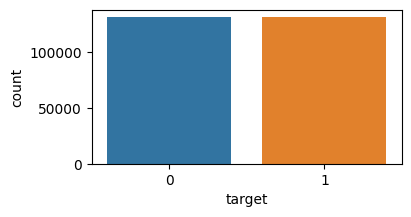

In [6]:
print(train['target'].value_counts())
plt.figure(figsize=(4,2))
sns.barplot(x=train['target'].value_counts().index, y=train['target'].value_counts())

In [ ]:
train.isnull().sum().sum()

In [1]:
null_value_df = train.isnull().sum().rename_axis('column').reset_index(name='null_count')
null_value_df['ratio'] = null_value_df['null_count']/train.shape[0]*100
null_value_df

NameError: name 'train' is not defined

In [4]:
train.dtypes.value_counts()

float64    255
int64        2
object       1
Name: count, dtype: int64

In [ ]:
train.select_dtypes(include=[ 'object', 'int64']).head()

In [ ]:
train_columns = [c for c in train.columns if c not in ['id', 'target']]
train[train_columns].nunique(axis=1)

In [ ]:
train_null = train.copy()
train_null.loc[np.random.random_sample(train_null.shape[0])<0.1, 'wheezy-cardinal-fousek-distraction'] = np.nan
train_null.loc[train_null['wheezy-cardinal-fousek-distraction'].isnull(),'wheezy-cardinal-fousek-distraction'] = -1
sns.displot(train_null['wheezy-cardinal-fousek-distraction'], bins = 100, kde=False)
del train_null
gc.collect()

In [ ]:
train_columns = [c for c in train.columns if c not in ['id', ' target']]
train[train_columns].nunique()

In [ ]:
print(np.where(train[train_columns].nunique()<250000))
print(train_columns[146])
train['wheezy-copper-turtle-magic'].nunique()

In [ ]:
print(train['wheezy-copper-turtle-magic'].value_counts().mean())
sns.displot(train['wheezy-copper-turtle-magic'].value_counts())
plt.show()
train['wheezy-copper-turtle-magic'].value_counts().rename_axis('wheezy-copper-turtle-magic').reset_index(name='counts')

In [ ]:
train_columns = [c for c in train.columns if c not in ['id','target','wheezy-copper-turtle-magic']]
describe_train = train[train_columns].describe().T.drop('count', axis=1)
f, a = plt.subplots(1, 7, figsize=(20, 4))
for i, name in enumerate(describe_train.columns):
    ax = a[i]
    sns.histplot(describe_train[name], ax=ax)
    ax.set_title(name, fontsize=15)
    ax.set_xlabel('')
# plt.tight_layout()
plt.show()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
describe_train.T.style.background_gradient(cmap, axis=1)

In [ ]:
train_columns = [c for c in train.columns if c not in ['id','target']]
target_0_df = train.loc[train['target']==0]
target_1_df = train.loc[train['target']==1]
plt.figure(figsize=(16,12))
for i, name in enumerate(train_columns[-25:]):
    plt.subplot(5,5,i+1)
    sns.histplot(target_0_df[name])
    sns.histplot(target_1_df[name])
    plt.title(name)
    plt.xlabel('')
    plt.legend(['0','1'])
    
plt.tight_layout()
plt.show()

In [ ]:
[c for c in train.columns if c.find('pembus')!=-1]

In [ ]:
from scipy.stats import probplot

f, a = plt.subplots(1,4,figsize=(20,4))
sns.histplot(train['gloppy-brass-beetle-pembus'], ax=a[0])
a[0].set_title('gloppy-brass-beetle-pembus distribution')
probplot(train['gloppy-brass-beetle-pembus'], plot=a[1])

sns.histplot(train.loc[train['wheezy-copper-turtle-magic']==0,'gloppy-brass-beetle-pembus'],ax=a[2])
a[2].set_title('wheezy-copper-turtle-magic == 0\ngloppy-brass-beetle-pembus distribution')
probplot(train.loc[train['wheezy-copper-turtle-magic']==0,'gloppy-brass-beetle-pembus'], plot=a[3])
plt.show()

In [ ]:
train_columns = [c for c in train.columns if c not in ['id','target']]
temp = train.loc[train['wheezy-copper-turtle-magic']==2]
target_0_df = temp.loc[temp['target']==0]
target_1_df = temp.loc[temp['target']==1]
f, a = plt.subplots(4, 4, figsize=(12,8))
for i, name in enumerate(train_columns[:16]):
    row = int(i%4)
    col = int(i/4)
    ax = a[row][col]
    sns.histplot(target_0_df[name], ax=ax)
    sns.histplot(target_1_df[name], ax=ax)
    std = target_0_df[name].std()
    ax.set_title(f'wheezy-copper-turtle-magic==0\n{name}',fontsize=10)
    ax.set_xlabel('')
    ax.legend(['0','1'])
    
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_classif
train_columns = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]
temp = train.loc[train['wheezy-copper-turtle-magic']==0]
mi = mutual_info_classif(temp[train_columns].values, temp['target'], discrete_features=False)

feature_stds = temp[train_columns].std().values

plt.plot(np.cumsum(mi[(feature_stds>1.5)&(mi!=0)]), label='high variance features')
plt.plot(np.cumsum(mi[(feature_stds<1.5)&(mi!=0)]), label='low variance features')
plt.legend()
plt.show()

In [ ]:
f, a = plt.subplots(1,5,figsize=(20,4))
train_columns = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]
temp = train.loc[train['wheezy-copper-turtle-magic']==0,train_columns].std()
sns.histplot(temp,ax=a[0])
a[0].set_title('std distribution')
useful = list(temp.index.values[temp>2])
useless = list(temp.index.values[temp<2])
sns.histplot(train.loc[train['wheezy-copper-turtle-magic']==0,useful[0]],ax=a[1])
a[1].set_title(f'wheezy-copper-turtle-magic==0\n{useful[0]}\nstd>2')
probplot(train.loc[train['wheezy-copper-turtle-magic']==0,useful[0]], plot=a[2])
sns.histplot(train.loc[train['wheezy-copper-turtle-magic']==0,useless[0]],ax=a[3])
a[3].set_title(f'wheezy-copper-turtle-magic==0\n{useless[0]}\nstd<2')
probplot(train.loc[train['wheezy-copper-turtle-magic']==0,useless[0]], plot=a[4])

In [ ]:
f, a = plt.subplots(2,2,figsize=(10,8))
vmin = -0.5
vmax = 0.5
sns.heatmap(train[useless[:len(useful)]+['target']].corr(), vmin=vmin, vmax=vmax,xticklabels=False, yticklabels=False,ax=a[0][0])
a[0][0].set_title('wheezy-copper-turtle-magic==0\nSTD < 2\nAll Train')
sns.heatmap(train[useful+['target']].corr(), vmin=vmin, vmax=vmax,xticklabels=False, yticklabels=False,ax=a[0][1])
a[0][1].set_title('wheezy-copper-turtle-magic==0\nSTD > 2\nAll Train')
sns.heatmap(train.loc[train['wheezy-copper-turtle-magic']==0,useless[:len(useful)]+['target']].corr(), vmin=vmin, vmax=vmax,xticklabels=False, yticklabels=False,ax=a[1][0])
a[1][0].set_title('wheezy-copper-turtle-magic==0\nSTD < 2\nwheezy-copper-turtle-magic=0 Train')
sns.heatmap(train.loc[train['wheezy-copper-turtle-magic']==0,useful+['target']].corr(), vmin=vmin, vmax=vmax,xticklabels=False, yticklabels=False,ax=a[1][1])
a[1][1].set_title('wheezy-copper-turtle-magic==0\nSTD > 2\nwheezy-copper-turtle-magic=0 Train')
plt.tight_layout()
plt.show()

In [ ]:
variance_over_2std = {}
for i in range(512):
    x_train = train[train['wheezy-copper-turtle-magic'] == i]
    x_test = test[test['wheezy-copper-turtle-magic'] == i]

    train_std = x_train[train_columns].std()
    cols = list(train_std.index.values[np.where(train_std >2)])
    variance_over_2std[i] = cols.copy()

In [ ]:
intersect_count = np.zeros((512,512))
for k, v in variance_over_2std.items():
    for k1, v1 in variance_over_2std.items():
        intersect_count[k,k1] = len(set(v).intersection(set(v1)))

In [ ]:
pd.DataFrame.from_dict(variance_over_2std, orient='index')

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(intersect_count))

In [ ]:
sns.histplot(pd.DataFrame(intersect_count).mean())

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import animation
from sklearn.decomposition import KernelPCA
train_columns = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]
x_train = train[train['wheezy-copper-turtle-magic'] == 0].reset_index(drop=True)
train_std = x_train[train_columns].std()
cols = list(train_std.index.values[np.where(train_std >2)])

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1, projection='3d') # Axe3D object
target1 = x_train.loc[x_train['target']==1]
target0 = x_train.loc[x_train['target']==0]
ax.scatter(target0[cols[0]],target0[cols[1]],target0[cols[2]])
ax.scatter(target1[cols[0]],target1[cols[1]],target1[cols[2]])
ax.set_xlabel(cols[0])
ax.set_ylabel(cols[1])
ax.set_zlabel(cols[2])
ax.set_title("Before apply Kernel PCA")

ax1 = fig.add_subplot(1,2,2,projection='3d') # Axe3D object
pca_transform = KernelPCA(n_components=len(cols), kernel='cosine',random_state=1).fit_transform(x_train[cols])
for i in range(len(cols)):
    x_train.loc[:, f'kpca_{i}'] = pca_transform[:,i]
target1 = x_train.loc[x_train['target']==1]
target0 = x_train.loc[x_train['target']==0]
ax1.scatter(target0['kpca_0'],target0['kpca_1'],target0['kpca_2'])
ax1.scatter(target1['kpca_0'],target1['kpca_1'],target1['kpca_2'])
ax1.set_xlabel(cols[0])
ax1.set_ylabel(cols[1])
ax1.set_zlabel(cols[2])
ax1.set_title("After apply Kernel PCA")

plt.tight_layout()

In [ ]:
train_columns = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]
x_train = train[train['wheezy-copper-turtle-magic'] == 0]
train_std = x_train[train_columns].std()
cols = list(train_std.index.values[np.where(train_std >2)])
target1 = x_train.loc[x_train['target']==1]
target0 = x_train.loc[x_train['target']==0]
sns.pairplot(x_train[cols[:5]+['target']],hue='target')
#sns.pairplot(target0[cols[:5]]) 

In [ ]:
#solution code
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedKFold

from sklearn.decomposition import KernelPCA
from sklearn.mixture import GaussianMixture as GMM
from sklearn import svm, neighbors, linear_model, neural_network
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import lightgbm as lgbm

In [ ]:
class hist_model(object):
    
    def __init__(self, bins=50):
        self.bins = bins
        
    def fit(self, X):
        
        bin_hight, bin_edge = [], []
        
        for var in X.T:
            # get bins hight and interval
            bh, bedge = np.histogram(var, bins=self.bins)
            bin_hight.append(bh)
            bin_edge.append(bedge)
        
        self.bin_hight = np.array(bin_hight)
        self.bin_edge = np.array(bin_edge)

    def predict(self, X):
        
        scores = []
        for obs in X:
            obs_score = []
            for i, var in enumerate(obs):
                # find wich bin obs is in
                bin_num = (var > self.bin_edge[i]).argmin()-1
                obs_score.append(self.bin_hight[i, bin_num]) # find bin hitght
            
            scores.append(np.mean(obs_score))
        
        return np.array(scores)

In [ ]:
def run_model(clf_list, train, test, random_state, gmm_init_params='kmeans'):
    
    MODEL_COUNT = len(clf_list)
    
    oof_train = np.zeros((len(train), MODEL_COUNT))
    oof_test = np.zeros((len(test), MODEL_COUNT))
    train_columns = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]
    
    for magic in tqdm_notebook(range(512)):
        x_train = train[train['wheezy-copper-turtle-magic'] == magic]
        x_test = test[test['wheezy-copper-turtle-magic'] == magic]
        print("Magic: ", magic, x_train.shape, x_test.shape)
        
        train_idx_origin = x_train.index
        test_idx_origin = x_test.index
        
        train_std = x_train[train_columns].std()
        cols = list(train_std.index.values[np.where(train_std >2)])
        
        x_train = x_train.reset_index(drop=True)
        y_train = x_train.target
        
        x_train = x_train[cols].values
        x_test = x_test[cols].values
        
        all_data = np.vstack([x_train, x_test])
        # print("all_data: ", all_data.shape)
        # Kernel PCA
        all_data = KernelPCA(n_components=len(cols), kernel='cosine', random_state=random_state).fit_transform(all_data)
        
        # GMM
        gmm = GMM(n_components=5, random_state=random_state, max_iter=1000, init_params=gmm_init_params).fit(all_data)
        gmm_pred = gmm.predict_proba(all_data)
        gmm_score = gmm.score_samples(all_data).reshape(-1, 1)
        gmm_label = gmm.predict(all_data)
        
        # hist feature
        hist = hist_model()
        hist.fit(all_data)
        hist_pred = hist.predict(all_data).reshape(-1, 1)
        
        all_data = np.hstack([all_data, gmm_pred, gmm_pred, gmm_pred, gmm_pred, gmm_pred])

        # Add Some Features
        all_data = np.hstack([all_data, hist_pred, gmm_score, gmm_score, gmm_score])
        
        # STANDARD SCALER
        all_data = StandardScaler().fit_transform(all_data)

        # new train/test
        x_train = all_data[:x_train.shape[0]]
        x_test = all_data[x_train.shape[0]:]
        # print("data size: ", x_train.shape, x_test.shape)
        fold = StratifiedKFold(n_splits=5, random_state=None)
        for trn_idx, val_idx in fold.split(x_train, gmm_label[:x_train.shape[0]]):
            for model_index, clf in enumerate(clf_list):
                clf.fit(x_train[trn_idx], y_train[trn_idx])
                oof_train[train_idx_origin[val_idx], model_index] = clf.predict_proba(x_train[val_idx])[:,1]
                
                # 2023/03/02 데이터의 형식이 변경되어, x_test 예측 시 오류 발생하는 것 수정
                if x_test.shape[0] == 0:
                    continue
                    
                #print(oof_test[test_idx_origin, model_index].shape)
                #print(x_test.shape)
                #print(clf.predict_proba(x_test)[:,1])
                oof_test[test_idx_origin, model_index] += clf.predict_proba(x_test)[:,1] / fold.n_splits
    
    for i, clf in enumerate(clf_list):
        print(clf)
        print(roc_auc_score(train['target'], oof_train[:, i]))
        print()
        
    oof_train_df = pd.DataFrame(oof_train)
    oof_test_df = pd.DataFrame(oof_test)
    
    return oof_train_df, oof_test_df

In [ ]:
os.listdir('/kaggle/input/original-instant-gratification')

In [ ]:
svnu_params = {'probability':True, 'kernel':'poly','degree':4,'gamma':'auto','nu':0.4,'coef0':0.08, 'random_state':4}
svnu2_params = {'probability':True, 'kernel':'poly','degree':2,'gamma':'auto','nu':0.4,'coef0':0.08, 'random_state':4}
qda_params = {'reg_param':0.111}
svc_params = {'probability':True,'kernel':'poly','degree':4,'gamma':'auto', 'random_state':4}
neighbor_params = {'n_neighbors':16}
lr_params = {'solver':'liblinear','penalty':'l1','C':0.05,'random_state':42}

In [ ]:
nusvc_model = svm.NuSVC(**svnu_params)
nusvc2_model = svm.NuSVC(**svnu2_params)
qda_model = QuadraticDiscriminantAnalysis(**qda_params)
svc_model = svm.SVC(**svc_params)
knn_model = neighbors.KNeighborsClassifier(**neighbor_params)
lr_model = linear_model.LogisticRegression(**lr_params)

model_list = [nusvc_model, nusvc2_model, qda_model, svc_model, knn_model, lr_model]
oof_train_kmeans_seed1, oof_test_kmeans_seed1 = run_model(model_list, train, test, 1)
oof_train_kmeans_seed2, oof_test_kmeans_seed2 = run_model(model_list, train, test, 2)
oof_train_random_seed1, oof_test_random_seed1 = run_model(model_list, train, test, 1, 'random')
oof_train_random_seed2, oof_test_random_seed2 = run_model(model_list, train, test, 2, 'random')

In [ ]:
train_second = (oof_train_kmeans_seed1 + oof_train_kmeans_seed2 + oof_train_random_seed1 + oof_train_random_seed2)/4
test_second = (oof_test_kmeans_seed1 + oof_test_kmeans_seed2 + oof_test_random_seed1 + oof_test_random_seed2)/4
print('Ensemble', roc_auc_score(train['target'], train_second.mean(1)))

In [ ]:
lgbm_meta_param = {
        #'bagging_freq': 5,
        #'bagging_fraction': 0.8,
        'min_child_weight':6.790,
        "subsample_for_bin":50000,
        'bagging_seed': 0,
        'boost_from_average':'true',
        'boost': 'gbdt',
        'feature_fraction': 0.450,
        'bagging_fraction': 0.343,
        'learning_rate': 0.025,
        'max_depth': 10,
        'metric':'auc',
        'min_data_in_leaf': 78,
        'min_sum_hessian_in_leaf': 8, 
        'num_leaves': 18,
        'num_threads': 8,
        'tree_learner': 'serial',
        'objective': 'binary', 
        'verbosity': 1,
        'lambda_l1': 7.961,
        'lambda_l2': 7.781
        #'reg_lambda': 0.3,
    }

mlp16_params = {'activation':'relu','solver':'lbfgs','tol':1e-06, 'hidden_layer_sizes':(16, ), 'random_state':42}

In [ ]:
SEED_NUMBER = 4
NFOLD = 5

y_train = train['target']
oof_lgbm_meta_train = np.zeros((len(train), SEED_NUMBER))
oof_lgbm_meta_test = np.zeros((len(test), SEED_NUMBER))
oof_mlp_meta_train = np.zeros((len(train), SEED_NUMBER))
oof_mlp_meta_test = np.zeros((len(test), SEED_NUMBER))

for seed in range(SEED_NUMBER):
    print("SEED Ensemble:", seed)
    mlp16_params['random_state'] = seed
    lgbm_meta_param['seed'] = seed
    folds = StratifiedKFold(n_splits=NFOLD, shuffle=True, random_state=seed)
    for fold_index, (trn_index, val_index) in enumerate(folds.split(train_second, y_train), 1):
        print(f"{fold_index} FOLD Start")
        trn_x, trn_y = train_second.iloc[trn_index], y_train.iloc[trn_index]
        val_x, val_y = train_second.iloc[val_index], y_train.iloc[val_index]
        
        mlp_meta_model = neural_network.MLPClassifier(**mlp16_params)
        mlp_meta_model.fit(trn_x, trn_y)
        
        oof_mlp_meta_train[val_index, seed] = mlp_meta_model.predict_proba(val_x)[:,1]
        oof_mlp_meta_test[:, seed] += mlp_meta_model.predict_proba(test_second)[:,1]/NFOLD
        print("MLP META SCORE: ", roc_auc_score(val_y, oof_mlp_meta_train[val_index, seed]))
        
        # lgbm meta model
        dtrain = lgbm.Dataset(trn_x, label=trn_y)
        dcross = lgbm.Dataset(val_x, label=val_y)

        lgbm_meta_model = lgbm.train(lgbm_meta_param, train_set=dtrain, valid_sets=[dtrain, dcross] 
)
        
        oof_lgbm_meta_train[val_index, seed] = lgbm_meta_model.predict(val_x)
        oof_lgbm_meta_test[:, seed] += lgbm_meta_model.predict(test_second)/NFOLD
        print("LGBM META SCORE: ", roc_auc_score(val_y, oof_lgbm_meta_train[val_index, seed]))
        

In [ ]:
oof_lgbm_meta_train_df = pd.DataFrame(oof_lgbm_meta_train).mean(axis=1).to_frame().rename(columns={0:'lgbm'})
oof_lgbm_meta_test_df = pd.DataFrame(oof_lgbm_meta_test).mean(axis=1).to_frame().rename(columns={0:'lgbm'})
oof_mlp_meta_train_df = pd.DataFrame(oof_mlp_meta_train).mean(axis=1).to_frame().rename(columns={0:'mlp'})
oof_mlp_meta_test_df = pd.DataFrame(oof_mlp_meta_test).mean(axis=1).to_frame().rename(columns={0:'mlp'})

In [ ]:
oof_train_third = pd.concat([train_second, oof_lgbm_meta_train_df, oof_mlp_meta_train_df], axis=1)
oof_test_third = pd.concat([test_second, oof_lgbm_meta_test_df, oof_mlp_meta_test_df], axis=1)
                                     
print('Ensemble', roc_auc_score(train['target'], oof_train_third.mean(1)))

In [ ]:
submission = pd.read_csv('/kaggle/input/original-instant-gratification/sample_submission.csv')
submission["target"] = oof_test_third.mean(1)
submission.to_csv("submission.csv", index=False)